# KNN Algorithm vs OLS
## Forecasting the academic performance in Antioquia - Colombia

The goal of this notebook its determinate wich algorithm provides better results in the moment to predict the academic performance given a vector of sociodemografic variables, only two simple algorithms are compared.

* Ordinary Leas Squared - OLS
* K Nearest Neighbors - KNN

The first its the K - Nearest Neighbors, is a non-parametric method, the input consists of the k closest training examples in the feature space. The prediction will be given by:

$$ \hat{Y} = \sum_{i \in I}\frac{Y_{i}}{N} $$

Where $I$  is a set formed by the results of K the nearest 
observations

In [112]:
## First its necessary import the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

In [111]:
## the data is loaded
x_train = pd.read_excel("datos/huy.xlsx")

In [3]:
## Take look at the data
x_train.head()

,estu_edad,codcole,educa_padre,educa_madre,ocupa_padre,ocupa_madre,estrato,matematicas,bsex,elibros,jornada,fac,area,tipo20
0,23,305001022666,1,4,11,10,2,38,0,1,2,1.111160,2,1
1,26,305001022470,9,7,2,4,4,31,1,3,1,2.073193,2,1
2,20,305001021741,7,7,9,9,5,44,1,2,2,2.125489,2,1
3,18,305001003688,9,9,8,10,6,93,0,3,1,2.492300,1,1
4,18,305001003688,9,9,1,10,6,63,0,3,1,2.492300,1,1


In [113]:
# the data is divided into objective variable and covariates
y = x_train["matematicas"]
datos = x_train[['estu_edad','codcole','educa_padre','educa_madre','ocupa_padre','ocupa_madre','estrato','bsex'
                ,'elibros','jornada','area','tipo20','fac']]

In [114]:
# Packages associated with KNN are imported. Only KNeighborsRegressor 
# Its used
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [115]:
# The training and test groups are created
xt, xtest, yt, ytest = train_test_split(datos, y, test_size=0.1, random_state=0)

In [127]:
# Now I do a bunch of KNN regressions, to try to find the optimal value
# of K, I look into the R-sq in the training and in the test set 
r2train = {}
r2test = {}
for k in range(1,100,10):
    knnreg = KNeighborsRegressor(n_neighbors=k,weights='uniform')
    knnreg.fit(xt, yt)
    r2train[k] = knnreg.score(xt, yt) # Store the regressors in a dictionary
    r2test[k] = knnreg.score(xtest,ytest)

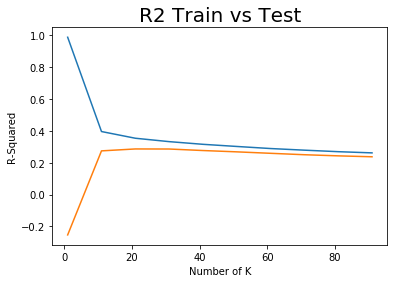

In [158]:
## Lets to compared the performance in a little plot

lists = sorted(r2train.items()) # sorted by key, return a list of tuples
lists2 = sorted(r2test.items()) 
x1,y1 = zip(*lists2)
x, y = zip(*lists)
plt.plot(x,y)
plt.plot(x1,y1)
plt.title('R2 Train vs Test',size = 20)
plt.xlabel('Number of K')
plt.ylabel('R-Squared')
plt.show()


The best fit in the test set its found around $ K = 30 $

In [162]:
knnreg = KNeighborsRegressor(n_neighbors=30,weights='uniform')
knnreg.fit(xt, yt)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform')

R-Sq: 0.28628202576296413


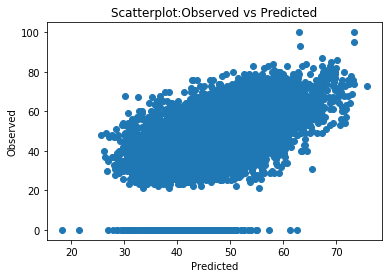

In [163]:
ypredx= knnreg.predict(xtest)
print('R-Sq:',knnreg.score(xtest,ytest))
plt.scatter(ypredx,ytest)
plt.title('Scatterplot:' 
          'Observed vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

## And what about the Overfitting
if I set the weights of a functions of distance, the predictions in the train are almost perfect, but what happends in with the predictions in the test set?

In [176]:
knnreg = KNeighborsRegressor(n_neighbors=30,weights='distance')
knnreg.fit(xt, yt)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='distance')

In [177]:
resid = ytest-knnreg.predict(xtest)
resid2 = yt -knnreg.predict(xt)

In [178]:
print('R2 Train:', knnreg.score(xt, yt), 'R2 Test:' , knnreg.score(xtest,ytest))

R2 Train: 0.9942150455248782 R2 Test: 0.28458297334908433


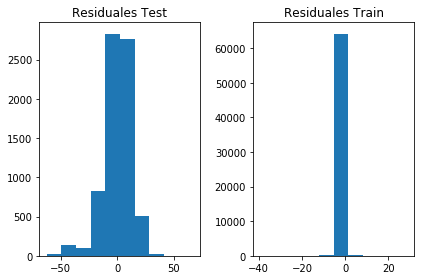

In [179]:
plt.subplot(121)
plt.title('Residuales Test')
plt.hist(resid)
plt.tight_layout()
plt.subplot(122)
plt.title('Residuales Train')
plt.hist(resid2)
plt.tight_layout()
plt.show()

# Ordinary Least Squared - OLS

The idea behind this method its assume that the relationship between the covariates $(x)$ and the objetive variable $(y)$ its linear. This assumption gives a function like:

$$ y = x \beta + \epsilon $$

so the idea its to minimize the Residuals Sum Squares and that its equivalent to minimie the Mean Squared Error of the model. This method has a close form and its given by:

$$ \beta =  (x'x)^{-1}  x'y$$

Another to improve the linear regression its to expand the space of covariates in order to get a more general form of the model, one way to do that its to include polynomial features. In the first part a simple OLS model its fitted and after that a model that allows polynomial features its evaluated.

In [181]:
# Two packages are imported
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [182]:
# A linear regression its estimated 
lg = LinearRegression(normalize=True,n_jobs = -3)
print(lg.fit(xt, yt))
lg.score(xt,yt)
#the R2 in the training set its less that the KNN algoritm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-3, normalize=True)


0.22756561334827852

In [15]:
ypred = lg.predict(xtest)
lg.score(xtest,ytest)
# The predicting power its still behin the KNN in the test set

0.2284123906236606

In [49]:
## The Polynomial features with interactions its considered 
poly = PolynomialFeatures(degree=3,interaction_only=False,include_bias=True)

In [50]:
# The data its transformed, in this case the size of the matrix increase.
xdata = poly.fit_transform(xt)

In [99]:
# A new model its estimated with the new data.
lg.fit(xdata,yt)
lg.score(xdata,yt)
# the Fit of the model has increas and could have a better performance than the KNN

0.30880996601110944

In [52]:
xdata2 = poly.fit_transform(xtest)
print(lg.score(xdata2,ytest))
olsp = lg.predict(xdata2)
## The prediction in the test set its still better than the KNN

0.2945867792961294


The Polynomial approach, has a better shape than the OLS 

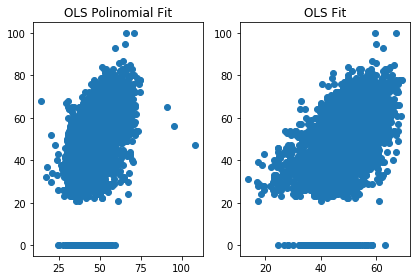

In [53]:
plt.subplot(121)
plt.tight_layout()
plt.title('OLS Polynomial Fit')
plt.scatter(olsp,ytest)
plt.subplot(122)
plt.title('OLS Fit')
plt.tight_layout()
plt.scatter(ypred,ytest)
plt.show()

## Now lest compre the OLS Poly with KNN

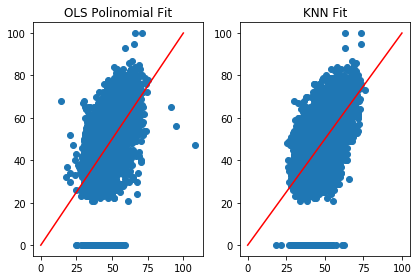

In [184]:
plt.subplot(121)
plt.tight_layout()
plt.title('OLS Polinomial Fit')
plt.scatter(olsp,ytest)
plt.plot([0,100],[0,100],'r-')
plt.subplot(122)
plt.title('KNN Fit')
plt.tight_layout()
plt.scatter(ypredx,ytest)
plt.plot([0,100],[0,100],'r-')
plt.show()

The KNN has a better shape there are less outliers, but its necesary to check another criteria to the determinate the best 

In [92]:
R = np.corrcoef(ypred,ypredx,rowvar=True)[1,0]
R2 = np.corrcoef(ypred,ytest)[1,0]
R3 = np.corrcoef(ypredx,ytest)[1,0]

In terms of correlations the prediction of the two algorithms are similar 

$$ Corr \left( \hat{Y}_{OLS} , \hat{Y}_{KNN} \right) =  0.69 $$

In this case they are related but in general both methods offers differents predictions. Finally to determinate wich one has the better fit to the test data I use a simple correlation coefficient. 

$$ Corr \left( \hat{Y}_{OLS} , \hat{Y}_{test} \right) =  0.48 $$
$$ Corr \left( \hat{Y}_{KNN} , \hat{Y}_{test} \right) =  0.53 $$

At this point we can say that the winner its the KNN algorithm, but in terms of R squared the OLS seem to have a better performance, but in generally the prediction of the academic performance seems to be a very difficult task

$$ R^{2}_{KNN} =  0.286 $$

$$R^{2}_{OLS} =  0.294 $$

